In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install jupyterthemes

In [ ]:
!jt -t onedork -f roboto -fs 12

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import numpy as np

In [4]:


# Set up SpotifyOAuth object
sp_oauth = SpotifyOAuth(
    client_id='eb7495dc1a014750a2cd7941b226a2cd',
    client_secret='f75efb152f9b4388bd83a3a4c82c4dcb',
    redirect_uri='http://localhost:8888/callback',
    scope='playlist-read-private user-library-read'
)


In [5]:
# Get the authorization URL and open it in a web browser
auth_url = sp_oauth.get_authorize_url()
print(f"Please navigate here: {auth_url}")

Please navigate here: https://accounts.spotify.com/authorize?client_id=eb7495dc1a014750a2cd7941b226a2cd&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Fcallback&scope=playlist-read-private+user-library-read


In [6]:
def get_user_authorization(sp_oauth):
   
    # After user logs in and authorizes access, they are redirected to the redirect URI
    code =("http://localhost:8888/callback?code=AQAPAX5ko_j1VT0-GqinkcI5DwieMAS0X97YKMM4C_K2q-IOC-vTXrxlqLGPH5YLHg8a81sQ6BrJBjEEEBpCUEWRG7wDMgWJMX3mPiRsG-Re9i9hFNOOYhD3tThdVqzJx0PFhOxHkatKjvKb9PuKVQWwCPWLhh8bi7Edr2Ua-jZs3IAHZ_hCNWIIXfluRFEvKSfxdwjBt3UOpb5XRfl759wTTPTn9mKNDv-10Q").split("code=")[-1].split("&")[0]

    # Now you can request the access and refresh tokens
    token_info = sp_oauth.get_access_token(code)

    # Create a Spotify client with the access token
    sp = spotipy.Spotify(auth=token_info['access_token'])

    return sp, token_info

#function to get user authorization and the Spotify client
sp, token_info = get_user_authorization(sp_oauth)

# Fetch playlists for the current user
playlists = sp.current_user_playlists()

# Extract the ID of the first playlist
first_playlist_id = playlists['items'][0]['id']


/var/folders/zb/zqlgkqnn2371cyr3tf2yqxpm0000gn/T/ipykernel_32088/3873276084.py:7: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_info = sp_oauth.get_access_token(code)


In [ ]:
#Debug
print(first_playlist_id)

In [7]:
def get_track_ids(sp, first_playlist_id):
    # Get the tracks in the playlist
    tracks = sp.playlist_items(first_playlist_id)

    # Extract track ids
    track_ids = [item['track']['id'] for item in tracks['items']]

    return track_ids



In [8]:
# Get track IDs for the first playlist
track_ids = get_track_ids(sp, first_playlist_id)

# Debug
#print(track_ids)

In [ ]:
#single_track = track_ids[0]


In [9]:

 # Get audio features for the track
def get_track_features(sp,track_ids):
    
    # Get the audio features for all tracks
    track_features_list = sp.audio_features(track_ids)
    
    #list into Pandas data frame
    df = pd.DataFrame(track_features_list)

    return df

df = get_track_features(sp,track_ids)


In [ ]:

df.head(10)

In [ ]:
df.tail(10)




In [10]:
# copy of  dataframe
df_copy = df.copy()

# Drop un-necessary columns
df_copy = df_copy.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1)

# Apply the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_copy), columns = df_copy.columns)


In [11]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_normalized), columns = df_normalized.columns)


In [12]:
import matplotlib.pyplot as plt

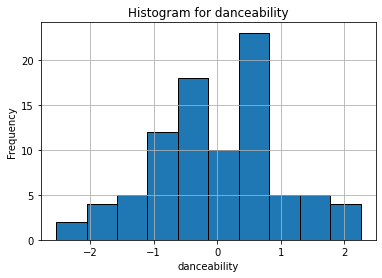

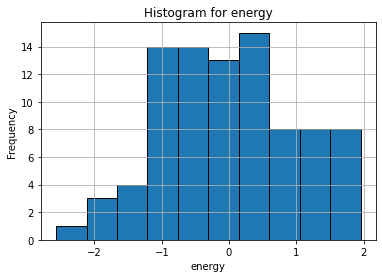

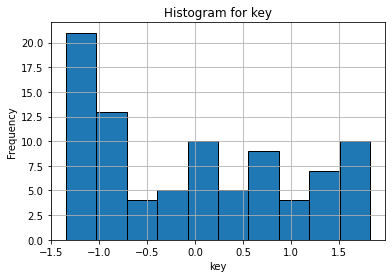

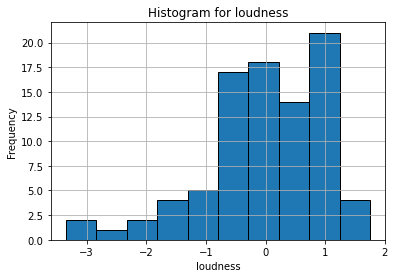

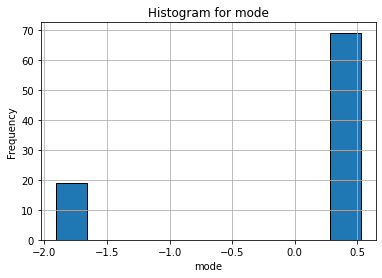

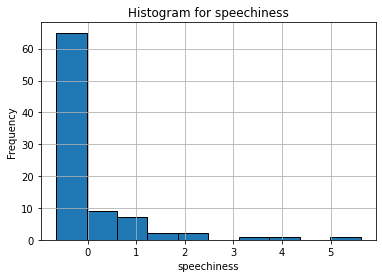

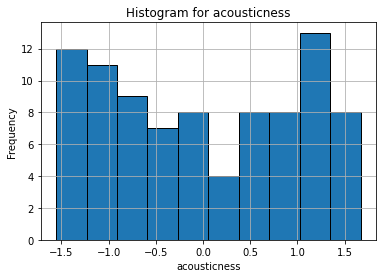

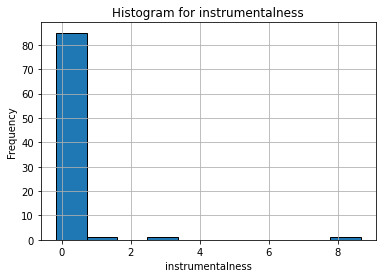

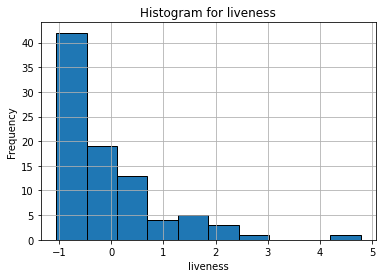

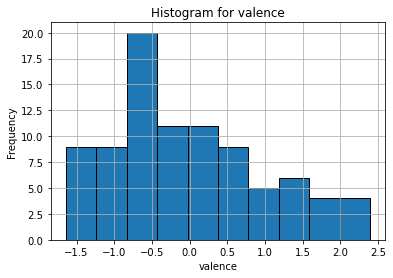

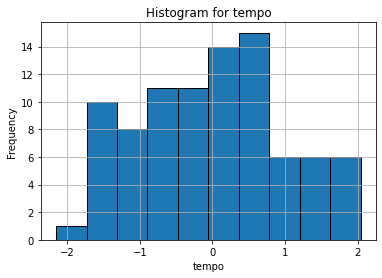

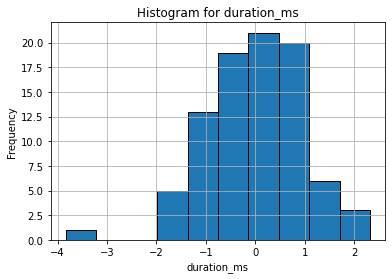

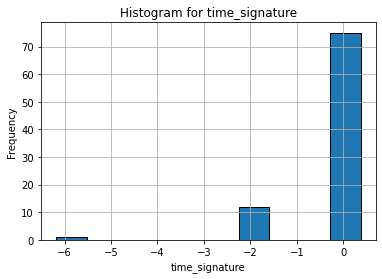

In [13]:
for label in df_standardized.columns:
    df_standardized[label].hist(bins=10, edgecolor='black')
    plt.title('Histogram for ' + label)
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.show()



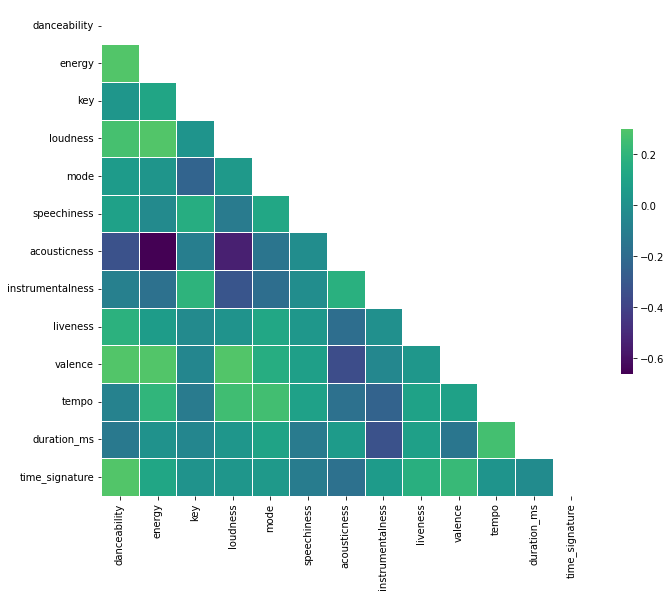

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_normalized.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="viridis", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [ ]:
import itertools

features = df_normalized.columns

# Get all combinations of pairs of features
feature_pairs = list(itertools.combinations(features, 2))

# For each pair of features, create a scatter plot
for pair in feature_pairs:
    sns.scatterplot(x=pair[0], y=pair[1], data=df_normalized)
    plt.title(f'Scatterplot of {pair[0]} and {pair[1]}')
    plt.show()



In [ ]:
print(f'Total count of scatterplot pairs generated: {len(feature_pairs)}')

In [15]:
# Define the ranges

ranges = [(-0.4, -0.3), (-0.3, -0.2), (-0.2, -0.1), (-0.1, 0), (0, 0.1), (0.1, 0.2), (0.2, 0.3)]

# Iterate through the ranges and count the correlations in each range
for r in ranges:
    count = ((corr > r[0]) & (corr <= r[1]) & ~mask).sum().sum()
    print(f"Number of correlations in range {r[0]} to {r[1]}: {count}")




Number of correlations in range -0.4 to -0.3: 4
Number of correlations in range -0.3 to -0.2: 2
Number of correlations in range -0.2 to -0.1: 13
Number of correlations in range -0.1 to 0: 11
Number of correlations in range 0 to 0.1: 23
Number of correlations in range 0.1 to 0.2: 11
Number of correlations in range 0.2 to 0.3: 6


In [16]:
# Compute the correlation matrix
corr = df_normalized.corr()

# Define the ranges
positive_ranges = [(0, 0.1), (0.1, 0.2), (0.2, 0.3)]
negative_ranges = [(-0.4, -0.3), (-0.3, -0.2), (-0.2, -0.1), (-0.1, 0)]
weak_range = (-0.1, 0.1)

# Function to find and print correlations in a given range
def find_correlations(ranges, label):
    print(f"{label} Correlations:")
    for range_min, range_max in ranges:
        for i in range(corr.shape[0]):
            for j in range(i+1, corr.shape[1]):
                value = corr.iloc[i, j]
                if range_min <= value < range_max:
                    print(f"  - {corr.columns[i]} and {corr.columns[j]}: {value}")

# Positive correlations
find_correlations(positive_ranges, "Positive")

# Negative correlations
find_correlations(negative_ranges, "Negative")

# Weak correlations
find_correlations([weak_range], "Weak")


Positive Correlations:
  - danceability and key: 0.031744772305747196
  - danceability and mode: 0.05912432034104161
  - danceability and speechiness: 0.0887752016356896
  - energy and mode: 0.027101904846901424
  - energy and liveness: 0.06567243359036738
  - energy and duration_ms: 0.008658688435460785
  - key and loudness: 0.023671623321406515
  - key and time_signature: 0.01472819271671155
  - loudness and mode: 0.047000255948898687
  - loudness and liveness: 0.015025952265452355
  - loudness and duration_ms: 0.031345075460008504
  - loudness and time_signature: 0.0313070274781253
  - mode and time_signature: 0.04593187739938862
  - speechiness and liveness: 0.04009432676035469
  - speechiness and valence: 0.07860174893235805
  - speechiness and tempo: 0.09338580098859692
  - acousticness and duration_ms: 0.05722461790045467
  - instrumentalness and time_signature: 0.05620206405742132
  - liveness and valence: 0.040956062227566745
  - liveness and tempo: 0.0980830740631481
  - live

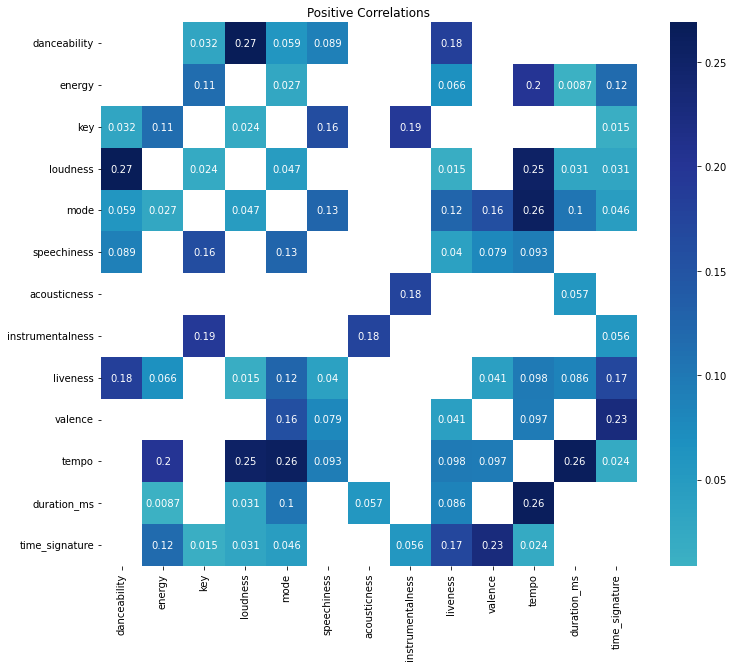

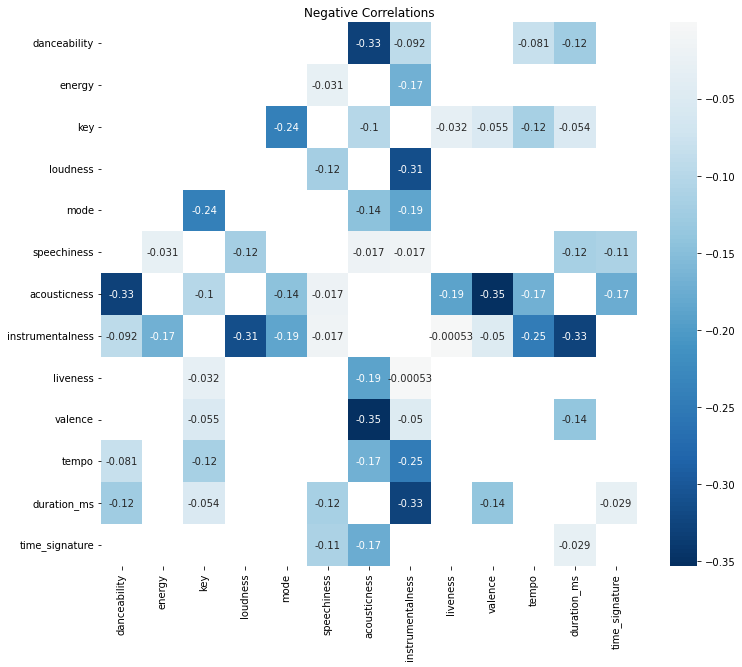

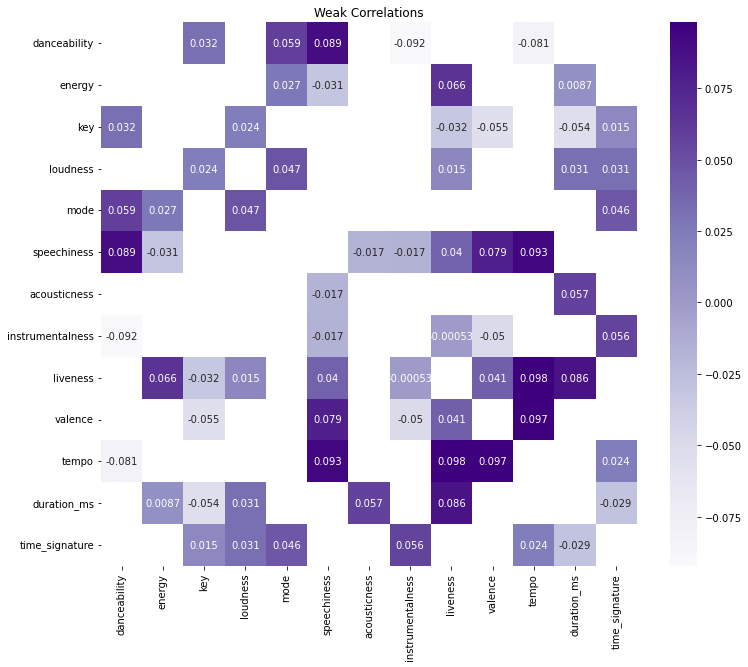

In [18]:
# import seaborn as sns
import matplotlib.pyplot as plt


# Create matrices for positive, negative, and weak correlations
positive_corr = corr.applymap(lambda x: x if 0 < x <= 0.3 else np.nan)
negative_corr = corr.applymap(lambda x: x if -0.4 <= x < 0 else np.nan)
weak_corr = corr.applymap(lambda x: x if -0.1 <= x <= 0.1 else np.nan)

# Plot Positive Correlations
plt.figure(figsize=(12, 10))
sns.heatmap(positive_corr, annot=True, cmap="YlGnBu", center=0)
plt.title('Positive Correlations')
plt.show()

# Plot Negative Correlations
plt.figure(figsize=(12, 10))
sns.heatmap(negative_corr, annot=True, cmap="RdBu_r", center=0)
plt.title('Negative Correlations')
plt.show()

# Plot Weak Correlations
plt.figure(figsize=(12, 10))
sns.heatmap(weak_corr, annot=True, cmap="Purples", center=0)
plt.title('Weak Correlations')
plt.show()
